# Project: World University Rankings 2023 Blog Post


## Section 1: Business Understanding

With the World University Rankings 2023, we will conduct a comprehensive exloratory data analysis (EDA) and write a blog post to help reader to understand the distribution of universities' rankings and scores.

The main questions are:

##### Question 1. What are the distributions of the top 15 universities' scores?
##### Question 2. What countries have the most universities ranked in the top 100 of the world?
##### Question 3. What is the significant indicator of the rankings of the universities in this data?

 Lets' get started with importing the necessary libraries.

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import clean
%matplotlib inline


## Section 2: Data Understanding

### Gather

In [317]:
df = pd.read_csv('./university_rankings_2023.csv', encoding='utf-8')
df.shape

(2341, 13)

### Explore

In [318]:
df.head(10)

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
5,6,California Institute of Technology,United States,"2,237",6.2,34%,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6
6,7,Princeton University,United States,"8,279",8.0,23%,46 : 54,92.4,87.6,95.9,99.1,66.0,80.3
7,8,"University of California, Berkeley",United States,"40,921",18.4,24%,52 : 48,92.1,86.4,95.8,99.0,76.8,78.4
8,9,Yale University,United States,"13,482",5.9,21%,52 : 48,91.4,92.6,92.7,97.0,55.0,70.9
9,10,Imperial College London,United Kingdom,"18,545",11.2,61%,40 : 60,90.4,82.8,90.8,98.3,59.8,97.5


In [319]:
# What is the shape of the DataFrame?
print("Shape of the dataset:", df.shape)

Shape of the dataset: (2341, 13)


In [320]:
# Describe the dataset
df.describe()

,No of student per staff,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
count,2208.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,19.000408,27.018010,23.016898,48.495887,47.104558,46.880378
std,12.132224,13.282243,16.763819,27.967185,15.093682,22.582401
min,0.400000,11.600000,7.400000,0.800000,36.900000,14.100000
25%,12.600000,18.000000,11.300000,23.100000,37.800000,27.900000
50%,16.600000,22.700000,17.000000,47.200000,40.500000,42.100000
75%,22.200000,31.850000,28.900000,72.350000,48.300000,62.100000
max,232.200000,94.800000,99.700000,100.000000,100.000000,99.700000


In [321]:
# Are there any missing values?
df.isnull().sum()

University Rank                  0
Name of University             108
Location                       294
No of student                  132
No of student per staff        133
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
dtype: int64

In [322]:
# What are the data types of the columns?
print(df.dtypes)

University Rank                 object
Name of University              object
Location                        object
No of student                   object
No of student per staff        float64
International Student           object
Female:Male Ratio               object
OverAll Score                   object
Teaching Score                 float64
Research Score                 float64
Citations Score                float64
Industry Income Score          float64
International Outlook Score    float64
dtype: object


The OverAll Score should be type float which is easier to handle (question 3)

In [323]:
df['OverAll Score'].unique()

array(['96.4', '95.2', '94.8', '94.2', '94.1', '92.4', '92.1', '91.4',
       '90.4', '89.4', '88.9', '88.8', '88.3', '88.2', '88.1', '87.4',
       '87.1', '85.9', '85.8', '85.7', '82.9', '82.7', '82.6', '82.1',
       '81.1', '79.8', '79.3', '78.5', '78.1', '77.7', '77.6', '77.1',
       '77.0', '76.5', '76.0', '75.9', '75.7', '75.4', '74.6', '74.1',
       '73.6', '73.2', '73.0', '72.9', '72.7', '72.4', '72.3', '72.0',
       '71.2', '71.1', '70.9', '70.8', '70.6', '70.5', '70.3', '69.6',
       '69.3', '69.0', '68.5', '68.4', '68.3', '68.2', '68.1', '68.0',
       '67.8', '67.7', '67.5', '67.2', '67.1', '66.6', '66.5', '66.4',
       '66.3', '65.8', '65.7', '65.5', '65.3', '65.1', '64.9', '64.7',
       '64.6', '64.5', '64.2', '63.9', '63.7', '63.6', '63.5', '63.4',
       '63.0', '62.9', '62.8', '62.7', '62.6', '62.5', '62.3', '62.2',
       '61.9', '61.7', '61.2', '61.1', '61.0', '60.9', '60.8', '60.7',
       '60.4', '60.2', '60.1', '59.8', '59.6', '59.4', '59.3', '59.0',
      

This may explain why OverAll Score should be type object. The feature contains a range such as "45.0 - 46.9"

## Section 3: Data Preparation

#### Question 1: What are the top 15 universities in the world?

In [324]:
#Top 15 Universities
top_15 = df.head(15)
top_15['Name of University']

0                      University of Oxford
1                        Harvard University
2                   University of Cambridge
3                       Stanford University
4     Massachusetts Institute of Technology
5        California Institute of Technology
6                      Princeton University
7        University of California, Berkeley
8                           Yale University
9                   Imperial College London
10                      Columbia University
11                               ETH Zurich
12                The University of Chicago
13               University of Pennsylvania
14                 Johns Hopkins University
Name: Name of University, dtype: object

#### Question 2: What countries have the most universities ranked in the top 100 in the world?

In [325]:
# There are 294 missing values in the location column.
# The location of each university cannot be replaced with the mode or KNN imputation.
# Therefore, the missing values will be dropped.
df_location= df.dropna(subset=['Location'], how='any')

# Top 100 Universities by Country
top_100 = df_location.head(100)
top_countries = top_100['Location'].value_counts()
top_countries

United States     40
United Kingdom    13
Germany            9
Switzerland        5
Netherlands        5
France             4
Australia          4
China              3
Canada             3
Sweden             2
Japan              2
South Korea        2
Belgium            2
Denmark            2
Singapore          1
Finland            1
Austria            1
Norway             1
Name: Location, dtype: int64

#### Question 3: What is the significant indicator of the rankings of the universities in this data?

In [326]:
# We found that the OverAll Score can be a range between two value. 
# This value can be replaced by the average of the bounds.
df['OverAll Score'] = [clean.range_hyphen_remover(str(score)) for score in df['OverAll Score']]

# Change the data type of the OverAll Score column to float
df['OverAll Score'] = df['OverAll Score'].astype(float)

# There are missing values in the Scores
# The dataset is sorted by the Rankings which based on the Overall Score.
# Therefore, the missing values can be filled with the last valid observation.
# Drop the rows with missing values in scores
score_cols = ['OverAll Score','Teaching Score','Research Score','Citations Score',\
    'Industry Income Score', 'International Outlook Score']
df[score_cols] = df[score_cols].ffill()
df_scores = df[score_cols].copy()

In [327]:
# Check the data types of the columns
df['OverAll Score'].unique()

array([96.4 , 95.2 , 94.8 , 94.2 , 94.1 , 92.4 , 92.1 , 91.4 , 90.4 ,
       89.4 , 88.9 , 88.8 , 88.3 , 88.2 , 88.1 , 87.4 , 87.1 , 85.9 ,
       85.8 , 85.7 , 82.9 , 82.7 , 82.6 , 82.1 , 81.1 , 79.8 , 79.3 ,
       78.5 , 78.1 , 77.7 , 77.6 , 77.1 , 77.  , 76.5 , 76.  , 75.9 ,
       75.7 , 75.4 , 74.6 , 74.1 , 73.6 , 73.2 , 73.  , 72.9 , 72.7 ,
       72.4 , 72.3 , 72.  , 71.2 , 71.1 , 70.9 , 70.8 , 70.6 , 70.5 ,
       70.3 , 69.6 , 69.3 , 69.  , 68.5 , 68.4 , 68.3 , 68.2 , 68.1 ,
       68.  , 67.8 , 67.7 , 67.5 , 67.2 , 67.1 , 66.6 , 66.5 , 66.4 ,
       66.3 , 65.8 , 65.7 , 65.5 , 65.3 , 65.1 , 64.9 , 64.7 , 64.6 ,
       64.5 , 64.2 , 63.9 , 63.7 , 63.6 , 63.5 , 63.4 , 63.  , 62.9 ,
       62.8 , 62.7 , 62.6 , 62.5 , 62.3 , 62.2 , 61.9 , 61.7 , 61.2 ,
       61.1 , 61.  , 60.9 , 60.8 , 60.7 , 60.4 , 60.2 , 60.1 , 59.8 ,
       59.6 , 59.4 , 59.3 , 59.  , 58.7 , 58.6 , 58.5 , 58.4 , 58.3 ,
       58.2 , 58.  , 57.9 , 57.8 , 57.7 , 57.6 , 57.5 , 57.4 , 57.2 ,
       57.  , 56.9 ,

In [328]:
# Changes in the missing values in the dataframe
df.isnull().sum()

University Rank                  0
Name of University             108
Location                       294
No of student                  132
No of student per staff        133
International Student          132
Female:Male Ratio              213
OverAll Score                    0
Teaching Score                   0
Research Score                   0
Citations Score                  0
Industry Income Score            0
International Outlook Score      0
dtype: int64

array([[<AxesSubplot:title={'center':'OverAll Score'}>,
        <AxesSubplot:title={'center':'Teaching Score'}>],
       [<AxesSubplot:title={'center':'Research Score'}>,
        <AxesSubplot:title={'center':'Citations Score'}>],
       [<AxesSubplot:title={'center':'Industry Income Score'}>,
        <AxesSubplot:title={'center':'International Outlook Score'}>]],
      dtype=object)

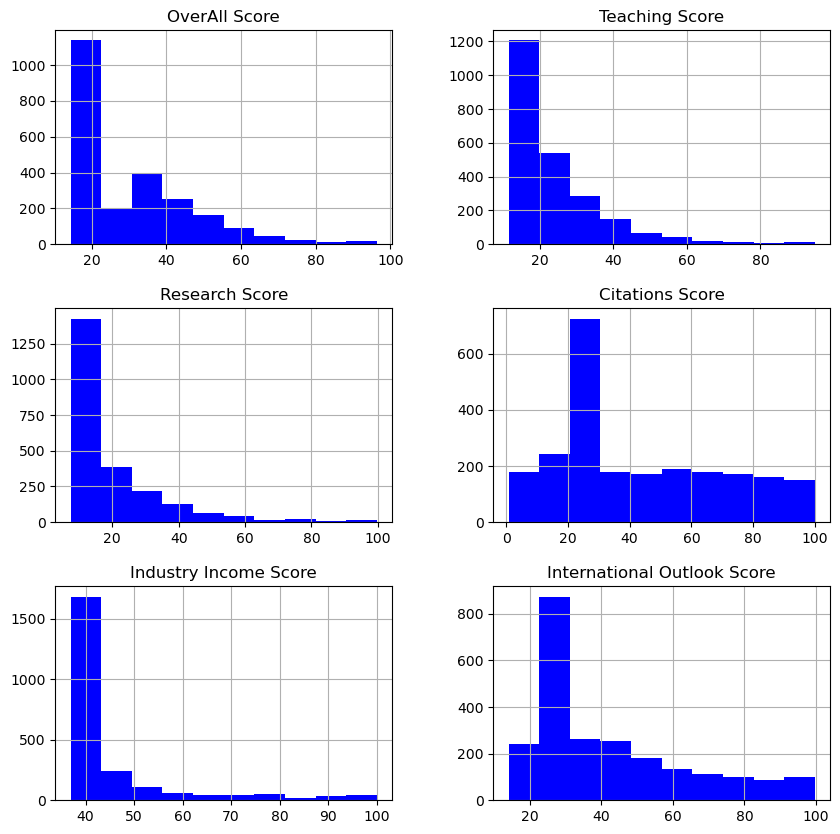

In [329]:
# Plotting the distribution of the scores
df_scores.hist(figsize=(10,10), bins=10, color='blue')

## Section 4: Evaluation

### Question 1: What are the top 15 universities in the world?

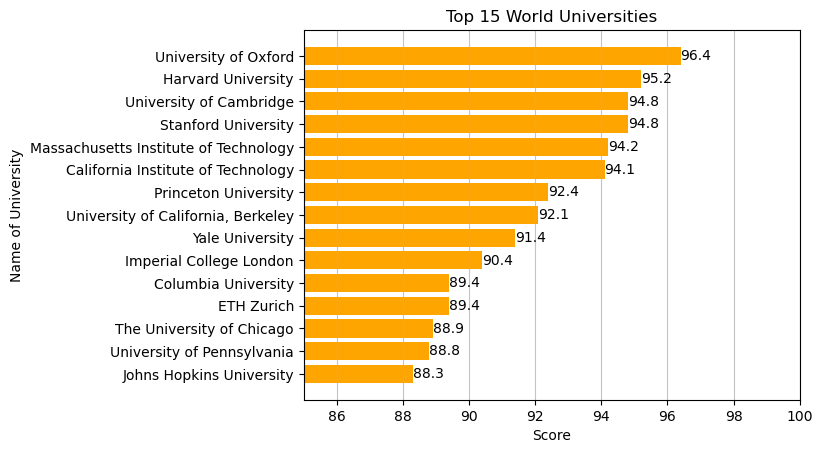

In [330]:
# Top 15 World Universities name and score to list
top_15_name = list(top_15['Name of University'])
top_15_score = list(top_15['OverAll Score'].astype(float))

# Plotting
fig, ax = plt.subplots()
ax.barh(top_15_name,top_15_score, color='orange')
plt.title('Top 15 World Universities')
plt.xlabel('Score')
plt.ylabel('Name of University')
plt.grid(axis='x', alpha=0.75)
plt.xlim(85,100)

for bars in ax.containers:
    ax.bar_label(bars)
plt.gca().invert_yaxis()
plt.show()

This is a tight competition between the top 15 Universities.

### Question 2. What countries have the most universities ranked in the top 100 in the world?

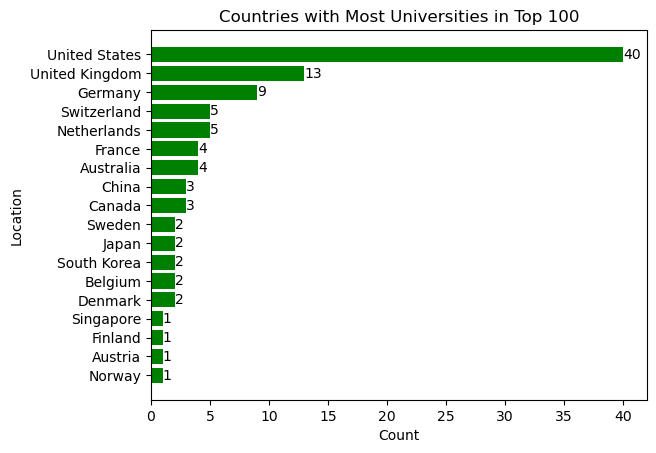

In [331]:
# Plotting the top 100 universities by country
fig, ax = plt.subplots()
ax.barh(list(top_countries.index),list(top_countries), color='green')
plt.title('Countries with Most Universities in Top 100')
plt.xlabel('Count')
plt.ylabel('Location')
for bars in ax.containers:
    ax.bar_label(bars)
plt.gca().invert_yaxis()
plt.show()

With 39 universities ranking among the top 100, the United States is unquestionably the clear winner of this leaderboard. Following behind is the United Kingdom, which has fewer than half the number of universities as the United States. Germany comes in third place. There are 2 countries in North America, 6 countries in Europe, 1 country in Oceania and 1 in Asia in the top 10 countries.

### Question 3. What is the significant indicator of the rankings of the universities in this data?

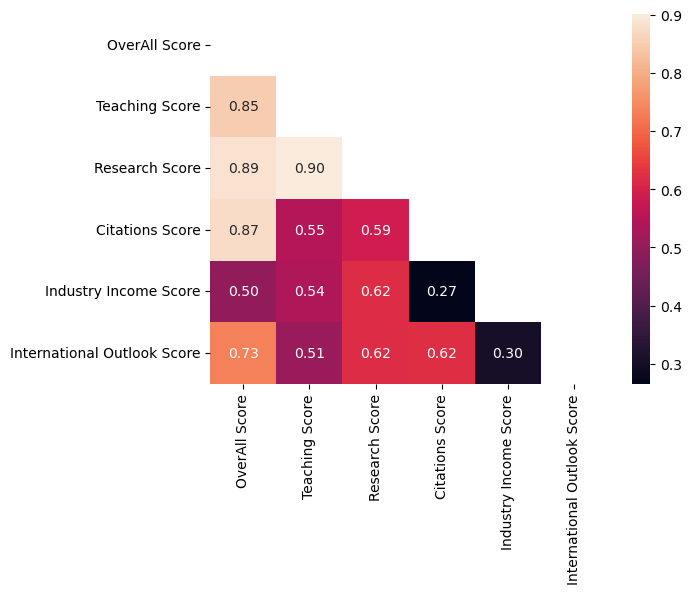

In [332]:
corr = df_scores.corr()

# Only need the Upper Triangle of the co-relation matrix because of symmetry
matrix = np.triu(corr)
sns.heatmap(df_scores.corr(), annot=True, fmt=".2f", mask=matrix);

From the heat map above, we can see that the ranking (OverAll Score) of the universities is influenced by the following indicators:
1. Research Score - 0.89
2. Citations Score - 0.87
3. Teaching Score - 0.85